<a href="https://colab.research.google.com/github/Romneasek/Hand_writting_recognition_project/blob/main/Hand_writting_recognition_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras import backend as K
#  to split the data of training and testing sets
(trainsetX, trainsety), (testsetX, testsety) = mnist.load_data()

print('Train: X = {}, y = {}'.format(trainsetX.shape, trainsety.shape)) 
print('Test: X = {}, y = {}'.format(testsetX.shape, testsety.shape))

Train: X = (60000, 28, 28), y = (60000,)
Test: X = (10000, 28, 28), y = (10000,)


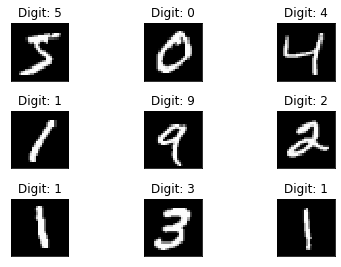

In [16]:
import numpy as np
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt


fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(trainsetX[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(trainsety[i]))
  plt.xticks([])
  plt.yticks([])
fig

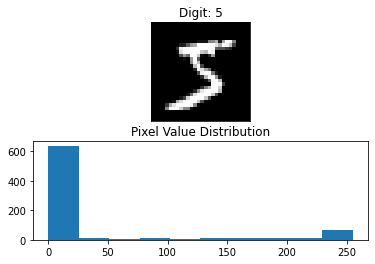

In [17]:
# In order to train our neural network to classify images we first have to unroll the height \timeswidth pixel format into one big vector - the input vector. So its length must be 28 \cdot 28 = 784. But let's graph the distribution of our pixel values.

fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(trainsetX[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(trainsety[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(trainsetX[0].reshape(784))
plt.title("Pixel Value Distribution")
fig

In [31]:
# let's print the shape before we reshape and normalize
print("trainsetX shape", trainsetX.shape)
print("trainsety shape", trainsety.shape)
print("testsetX shape", testsetX.shape)
print("testsety shape", testsety.shape)

trainsetX shape (60000, 28, 28, 1)
trainsety shape (60000, 10)
testsetX shape (10000, 28, 28, 1)
testsety shape (10000, 10)


In [19]:
# The Data Preprocessing
# Model cannot take the image data directly so we need to perform some basic operations and process the data to make it ready for our neural network.
# The dimension of the training data is (60000*28*28). One more dimension is needed for the CNN model so we reshape the matrix to shape (60000*28*28*1).
# Let's reshape our inputs to a single vector vector and normalize the pixel values to lie between 0 and 1.

from keras import utils as np_utils

trainsetX = trainsetX.reshape(trainsetX.shape[0], 28, 28, 1)
testsetX = testsetX.reshape(testsety.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# conversion of class vectors to matrices of  binary class 
trainsety = keras.utils.np_utils.to_categorical(trainsety)
testsety = keras.utils.np_utils.to_categorical(testsety)
trainsetX = trainsetX.astype('float32')
testsetX = testsetX.astype('float32')
trainsetX /= 255
testsetX /= 255

In [20]:
# Create the model

batch_size = 128
num_classes = 10
epochs = 10
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,metrics=['accuracy'], optimizer='adam')

In [21]:
# Train the model

hist = model.fit(trainsetX, trainsety, batch_size=128, epochs=10,verbose=1,validation_data=(testsetX, testsety))
print("The model has successfully trained")
model.save('mnist.h5')
print("Saving the bot as mnist.h5")

Epoch 1/10
469/469 [==============================] - 164s 347ms/step - loss: 0.1966 - accuracy: 0.9401 - val_loss: 0.0463 - val_accuracy: 0.9848
Epoch 2/10
469/469 [==============================] - 164s 351ms/step - loss: 0.0684 - accuracy: 0.9791 - val_loss: 0.0379 - val_accuracy: 0.9874
Epoch 3/10
469/469 [==============================] - 160s 340ms/step - loss: 0.0469 - accuracy: 0.9858 - val_loss: 0.0293 - val_accuracy: 0.9901
Epoch 4/10
469/469 [==============================] - 158s 337ms/step - loss: 0.0389 - accuracy: 0.9880 - val_loss: 0.0289 - val_accuracy: 0.9908
Epoch 5/10
469/469 [==============================] - 155s 331ms/step - loss: 0.0330 - accuracy: 0.9892 - val_loss: 0.0295 - val_accuracy: 0.9900
Epoch 6/10
469/469 [==============================] - 155s 331ms/step - loss: 0.0282 - accuracy: 0.9912 - val_loss: 0.0302 - val_accuracy: 0.9909
Epoch 7/10
469/469 [==============================] - 155s 330ms/step - loss: 0.0245 - accuracy: 0.9915 - val_loss: 0.0280 -

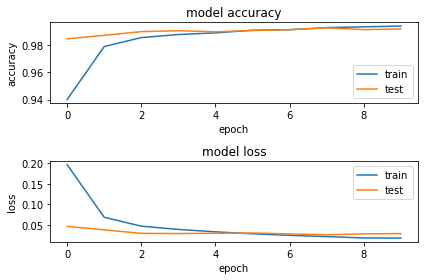

In [27]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

In [28]:
#Evaluate the model's Performance

score = model.evaluate(testsetX, testsety, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.028759881854057312
Test accuracy: 0.9921000003814697


In [65]:
# load the model and create predictions on the test set

from keras import models

mnist_model = models.load_model('mnist.h5')
predicted_classes = mnist_model.predict(testsetX)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == testsety)[0]
incorrect_indices = np.nonzero(predicted_classes != testsety)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")



4363  classified correctly
95637  classified incorrectly


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


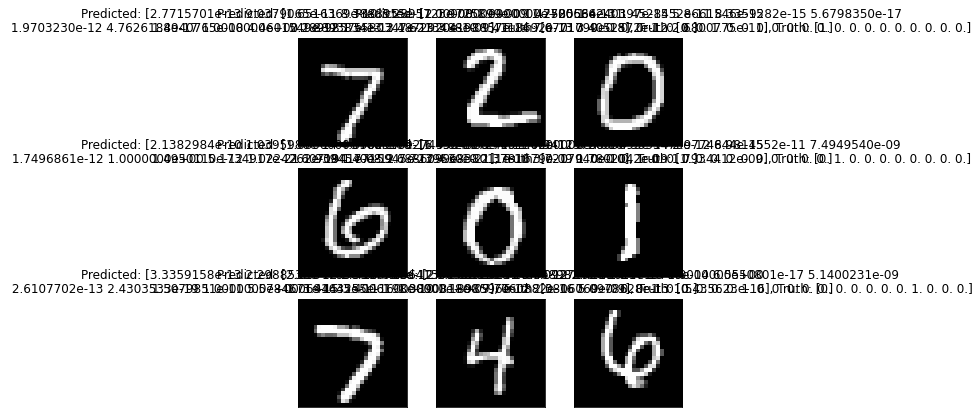

In [79]:
# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(testsetX[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        testsety[correct]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation


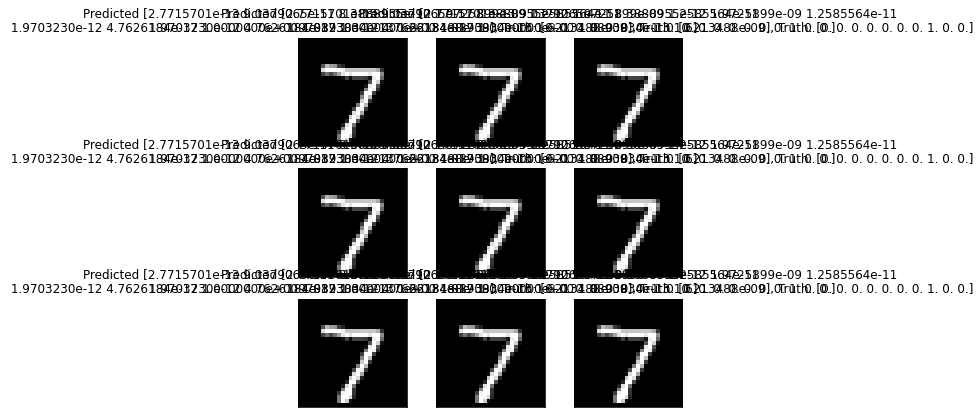

In [76]:
# plot 9 incorrect predictions

plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(testsetX[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
     "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                      testsety[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation